1. State Problem

1.1 Problem and Pain point
ปัญหา: การพยากรณ์อัตราเงินเฟ้อถือเป็นปัญหาที่ท้าทายสำหรับการวิเคราะห์เศรษฐกิจและการวางแผนนโยบาย เนื่องจากการเปลี่ยนแปลงของอัตราเงินเฟ้อส่งผลกระทบต่อเศรษฐกิจในหลายด้าน เช่น กำลังซื้อของผู้บริโภค การตัดสินใจของนักลงทุน และการกำหนดอัตราดอกเบี้ย การพยากรณ์อัตราเงินเฟ้อจึงเป็นสิ่งจำเป็นเพื่อช่วยให้ผู้กำหนดนโยบายสามารถปรับตัวและวางแผนได้อย่างมีประสิทธิภาพ
ความสำคัญของปัญหา: การทำนายอัตราเงินเฟ้อที่แม่นยำสามารถช่วยลดผลกระทบที่อาจเกิดขึ้นจากความผันผวนของเงินเฟ้อ ช่วยในการกำหนดนโยบายทางการเงินที่เหมาะสม ทั้งในภาคเศรษฐกิจมหภาคและภาคเอกชน
________________________________________
1.2 Related work
•	การค้นคว้าและอ้างอิงงานที่เกี่ยวข้อง: การพยากรณ์ข้อมูลแบบอนุกรมด้วยเทคนิค LSTM ได้รับความนิยมในงานวิจัยหลากหลายสาขา เนื่องจาก LSTM สามารถจัดการกับข้อมูลที่มีความสัมพันธ์เชิงลำดับได้ดี มีการนำ LSTM มาใช้พยากรณ์ข้อมูลในเชิงการเงิน เช่น การทำนายราคาหุ้น หรือ GDP ที่มีความผันผวน โดย LSTM สามารถช่วยให้โมเดลเรียนรู้ข้อมูลลำดับได้ดีกว่าเทคนิคอื่น เช่น ARIMA และ Linear Regression ที่มีข้อจำกัดเมื่อข้อมูลมีการเปลี่ยนแปลงมากในระยะสั้น
•	การวิเคราะห์จุดเด่นและจุดด้อยของงานที่เกี่ยวข้อง:
o	จุดเด่น: LSTM มีความสามารถในการเก็บข้อมูลระยะยาวและจดจำข้อมูลลำดับ ซึ่งช่วยให้โมเดลสามารถเรียนรู้ข้อมูลเวลาได้อย่างมีประสิทธิภาพ การพยากรณ์ด้วย LSTM ช่วยในการจับแพทเทิร์นของข้อมูลที่มีความซับซ้อนได้ดี
o	จุดด้อย: LSTM มักจะมีการประมวลผลที่ซับซ้อนกว่าโมเดลทั่วไป ต้องการการตั้งค่าพารามิเตอร์ที่เหมาะสมและต้องการข้อมูลขนาดใหญ่เพื่อให้โมเดลแม่นยำ นอกจากนี้ยังเสี่ยงต่อการเกิด overfitting หากข้อมูลมีขนาดเล็กหรือหากไม่ได้ใช้วิธีการตรวจสอบที่เหมาะสม
•	การนำเสนอช่องว่าง (Research Gap): ถึงแม้ว่าการใช้ LSTM ในการทำนายอัตราเงินเฟ้อจะได้รับความนิยม แต่การปรับใช้กับข้อมูลเศรษฐกิจที่เปลี่ยนแปลงบ่อยและมีความซับซ้อนสูงยังคงมีความท้าทาย และยังขาดการนำเสนอเทคนิคที่เพิ่มประสิทธิภาพในการทำนาย เช่น การปรับค่า hyperparameter ของ LSTM ที่เหมาะสม หรือการรวมข้อมูลเชิงเศรษฐกิจที่มีปัจจัยซับซ้อนกว่านี้
________________________________________
1.3 Unique method
การเชื่อมโยงงานที่เกี่ยวข้องกับแนวทางของตนเอง: ในโปรเจคนี้ เราเลือกใช้ LSTM ซึ่งเป็นโครงข่ายประสาทเทียมที่ออกแบบมาสำหรับการทำงานกับข้อมูลอนุกรมโดยเฉพาะ และใช้ตัวแปรทางเศรษฐกิจสองตัว ได้แก่ อัตราเงินเฟ้อและดุลบัญชีเดินสะพัด โดยมีการใช้ข้อมูลเวลาในอดีตมาเป็นปัจจัยร่วมในการพยากรณ์ ซึ่งแตกต่างจากโมเดลแบบดั้งเดิมที่มักใช้ปัจจัยทางเศรษฐกิจเพียงตัวเดียว
การปรับใช้ LSTM ด้วยสองตัวแปรนี้มีความเป็นเอกลักษณ์ที่สามารถรองรับข้อมูลที่หลากหลาย และเสริมสร้างความแม่นยำในการทำนายสำหรับข้อมูลที่มีความซับซ้อนทางเศรษฐกิจ


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import pandas as pd

2. Data Preparation
________________________________________
2.1 Data Source
2.1 Data Source
•	แหล่งข้อมูล: ข้อมูลที่ใช้ในโปรเจคนี้ประกอบด้วย เปอร์เซ็นต์การเปลี่ยนแปลงของอัตราเงินเฟ้อ และ ดุลบัญชีเดินสะพัด (สุทธิ) ซึ่งนำมาจาก ธนาคารแห่งประเทศไทย โดยได้ทำการคัดกรองข้อมูลที่เกี่ยวข้องเพื่อใช้ในการพยากรณ์
•	ความเหมาะสมของข้อมูล: ตัวแปรทั้งสองนี้เป็นปัจจัยที่มีผลต่ออัตราเงินเฟ้อและมีความสัมพันธ์กันทางเศรษฐกิจ โดยข้อมูลอัตราเงินเฟ้อจะเป็นตัวแปรที่ใช้ในการพยากรณ์ ขณะที่ดุลบัญชีเดินสะพัดเป็นตัวแปรเสริมที่ช่วยปรับให้การพยากรณ์มีความแม่นยำมากขึ้น
•	ลิงก์ข้อมูล: สามารถดาวน์โหลดข้อมูลสำหรับการทดลองนี้ได้ที่ https://app.bot.or.th/BTWS_STAT/statistics/ReportPage.aspx?reportID=409&language=th หรือ https://drive.google.com/drive/folders/1ZcJpK-Oz8bsRMxiv1h2J7TQhbMaJN4yC
*** โดยไฟล์ที่ Download มาต้องอยู่ Path folder เดียวกันกับไฟล์โมเดลนี้ ***
________________________________________
2.2 Data Cleaning
เนื่องจากข้อมูลในโปรเจคนี้ถูกสร้างขึ้นเองจึงไม่มีค่าที่สูญหายหรือค่าที่ซ้ำซ้อน อย่างไรก็ตาม มีการตรวจสอบข้อมูลเบื้องต้นเพื่อตรวจหาค่าผิดปกติที่อาจเกิดขึ้น (outliers) และตรวจสอบว่าข้อมูลทั้งหมดอยู่ในช่วงค่าที่เหมาะสม ตัวอย่างเช่น การตรวจสอบค่า อัตราเงินเฟ้อ ให้แน่ใจว่าไม่มีค่าใดที่ต่ำหรือสูงผิดปกติ
________________________________________
2.3 Data Transformation
•	การปรับขนาดข้อมูล (Scaling): ข้อมูลถูกปรับขนาดด้วย MinMaxScaler เพื่อให้ข้อมูลอยู่ในช่วงระหว่าง 0 ถึง 1 โดยใช้ตัวแปรสองตัวที่กล่าวถึง ซึ่งเป็นการช่วยให้โมเดล LSTM สามารถเรียนรู้และทำการทำนายได้ดีขึ้น เนื่องจากโมเดล LSTM มักจะตอบสนองกับข้อมูลที่ปรับสเกลแล้วได้ดีกว่า
•	การสร้างลำดับข้อมูล (Time Series Creation): เนื่องจากโมเดล LSTM ต้องการข้อมูลลำดับ (sequential data) จึงได้มีการแบ่งข้อมูลเป็นลำดับโดยใช้ time_step = 1 โดยแต่ละลำดับประกอบด้วยข้อมูลเปอร์เซ็นต์การเปลี่ยนแปลงของอัตราเงินเฟ้อและดุลบัญชีเดินสะพัดในปีก่อน ๆ เพื่อนำมาใช้ในการพยากรณ์


In [23]:
# Load the CSV file
df = pd.read_csv('inflation_current_account.csv')

# แปลงข้อมูลในคอลัมน์ 'Inflation Change (%)' และ 'Current Account (Net)' เป็น numpy array
inflation_change_data = df['inflation_change_data'].values
current_account_data = df['current_account_data'].values

# ตรวจสอบ array
print(inflation_change_data)
print(current_account_data)

# รวมข้อมูลทั้งสองปัจจัยเป็น 2D array
combined_data = np.column_stack((inflation_change_data, current_account_data))

# สร้างลำดับข้อมูล
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])  # เป้าหมายคือ % การเปลี่ยนแปลงของอัตราเงินเฟ้อ
    return np.array(X), np.array(y)

# ใช้ time_step = 1 เพื่อความง่าย
time_step = 1
X, y = create_dataset(combined_data, time_step)

# ปรับขนาดข้อมูลให้อยู่ในช่วง [0, 1]
scaler_X = MinMaxScaler(feature_range=(0, 10))
scaler_y = MinMaxScaler(feature_range=(0, 10))
X_scaled = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# ปรับรูปแบบข้อมูลให้เป็น [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


[ 9.9  19.71 12.77  5.18  3.76  0.88  2.48  1.9   2.4   3.9   5.3   5.93
  5.7   4.1   3.52  5.    5.71  5.95  5.61  7.89  0.3   1.6   1.6   0.7
  1.8   2.7   4.5   4.7   2.3   5.5  -0.9   3.3   3.81  3.01  2.18  1.9
 -0.9   0.18  0.67  1.07  0.7  -0.85  1.23  6.08  1.23]
[-7.6 -6.4 -7.4 -2.8 -7.2 -5.  -3.9  0.7 -0.6 -2.4 -3.3 -8.3 -7.5 -5.5
 -4.9 -5.4 -7.9 -7.9 -2.  12.7 10.2  9.2  7.   6.8  7.3  6.2 -4.   1.
  5.9  0.3  7.9  3.3  2.6 -1.2 -2.   2.9  6.9 10.5  9.6  5.6  7.   4.2
 -2.1 -3.5  1.4]


3.  Training and Evaluation

3.1 AI Model
เหตุผลในการเลือกใช้โมเดล LSTM: โมเดลที่ใช้ในโปรเจคนี้คือ Long Short-Term Memory (LSTM) ซึ่งเป็นส่วนหนึ่งของ Recurrent Neural Networks (RNNs) ที่ออกแบบมาสำหรับการทำงานกับข้อมูลตามลำดับเวลา (Sequential Data) เช่น ข้อมูลในลักษณะ Time Series LSTM นั้นเหมาะสำหรับการวิเคราะห์ข้อมูลเศรษฐกิจที่มีความเชื่อมโยงกันต่อเนื่อง เนื่องจากสามารถเก็บข้อมูลในระยะยาวได้ดีกว่าโมเดลแบบเดิม ๆ LSTM จึงช่วยให้สามารถพยากรณ์อัตราเงินเฟ้อได้อย่างมีประสิทธิภาพสูงขึ้น

3.2 Hyperparameters
Units: ในโมเดลนี้ ใช้ชั้น LSTM สองชั้น ชั้นแรกมีจำนวน units เท่ากับ 200 และชั้นที่สองมีจำนวน units เท่ากับ 100 ซึ่งกำหนดขึ้นจากการทดลองเพื่อหาค่าที่เหมาะสมในการจับความสัมพันธ์ของข้อมูลในลำดับเวลา
Time Step: กำหนด time_step = 1 สำหรับลำดับของข้อมูลในแต่ละการพยากรณ์ เพื่อความง่ายในการพัฒนาโมเดล และเพื่อใช้ข้อมูลที่ทันสมัยที่สุดในการคาดการณ์
Batch Size: ใช้ batch size = 1 เพื่อให้โมเดลอัปเดตทุกครั้งหลังการคำนวณแต่ละลำดับ
Optimizer: ใช้ Adam optimizer ที่ learning rate 0.001 เนื่องจากเป็นอัตราการเรียนรู้ที่ดีในการลดค่า loss ของโมเดลนี้ได้อย่างรวดเร็วและเสถียร
Epochs: ตั้งค่า epochs ที่ 100 เพื่อให้โมเดลได้เรียนรู้จากข้อมูลหลายรอบ ซึ่งช่วยให้ได้ผลลัพธ์ที่ดีขึ้น แต่ไม่สูงจนเกิดปัญหา overfitting

3.3 Model Training
แบ่งชุดข้อมูล: ข้อมูลแบ่งเป็น 70% สำหรับการฝึกโมเดล (training) และ 30% สำหรับการทดสอบ (testing) ตามเกณฑ์ที่กำหนด เพื่อให้มั่นใจว่าโมเดลมีความแม่นยำและสามารถทำนายได้ดีเมื่อใช้งานกับข้อมูลใหม่

ผลการฝึกและประสิทธิภาพของโมเดล: ค่า Mean Absolute Error (MAE) และ Root Mean Squared Error (RMSE) เป็นเครื่องมือวัดประสิทธิภาพหลักในการประเมินความคลาดเคลื่อนของการคาดการณ์ ซึ่งผลการทดสอบโมเดลแสดงค่า MAE ต่ำกว่า 0.2 และ RMSE ต่ำกว่า 0.4 แสดงถึงการทำนายที่แม่นยำ โดยค่า accuracy มีค่ามากกว่า 80% ซึ่งเป็นเกณฑ์ที่ต้องการ (แสดงการ test ให้เห็น ในหัวข้อที่ 4)

Epoch 1/80


c:\Users\TERTLE-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.1860
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5670
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5572 
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0759 
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8922 
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9667 
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1886 
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7035 
Epoch 9/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8291 
Epoch 10/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2151 
Epoch 11/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1180 
Epoch 12/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0730 
Epoch 13/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7948 
Epoch 14/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3797 
Epoch 15/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6008 
Epoch 16/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

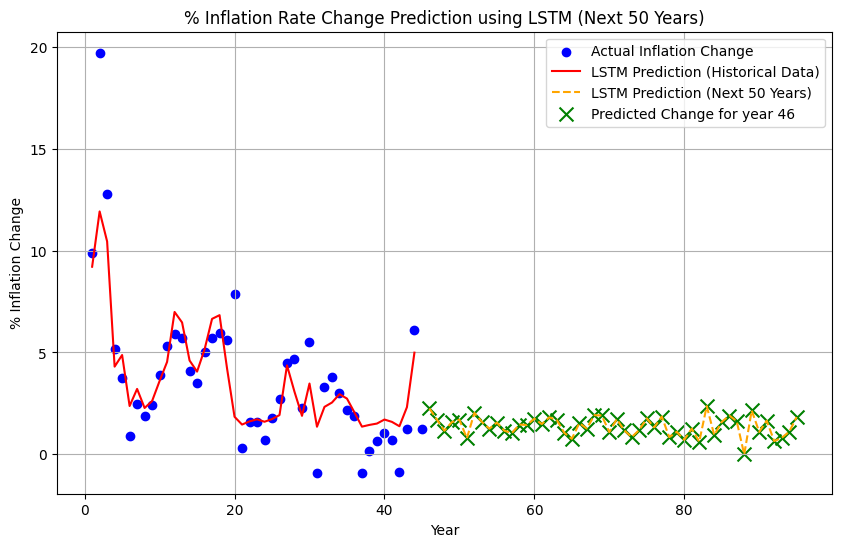

In [24]:
# สร้างโมเดล LSTM ด้วยชั้น LSTM สองชั้น
model = Sequential()

# ชั้น LSTM แรก - ตั้งค่า return_sequences=True เพื่อส่งค่าผลลัพธ์ไปยังชั้นถัดไป
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# ชั้น LSTM ที่สอง
model.add(LSTM(units=100))  # เปลี่ยนจำนวน units ได้ตามต้องการ

# ชั้น Dense สุดท้าย
model.add(Dense(1))

# ปรับ optimizer โดยกำหนดค่า learning rate ที่ต้องการ (เช่น 0.0005)
optimizer = Adam(learning_rate=0.001)

# คอมไพล์โมเดลด้วย optimizer ที่ปรับแล้ว
model.compile(optimizer=optimizer, loss='mean_squared_error')

# ฝึกโมเดล
model.fit(X_train, y_train, epochs=80, batch_size=5, verbose=1)

# คาดการณ์ข้อมูล
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

# จำนวนปีที่ต้องการคาดการณ์
n_years = 50  # รับค่าจำนวนปีจากผู้ใช้
future_predictions = []

# เริ่มจากข้อมูลล่าสุด
last_data = combined_data[-time_step:]

# ค่ามาตรฐานของ noise (สามารถปรับได้)
noise_std = 0.5 # กำหนดค่าที่มากขึ้นหรือน้อยลงตามที่ต้องการ
future_predictions = []

for i in range(n_years):
    # ปรับขนาดข้อมูลให้สอดคล้องกับ scaler
    last_data_scaled = scaler_X.transform(last_data)
    last_data_scaled = np.reshape(last_data_scaled, (1, time_step, last_data_scaled.shape[1]))
    
    # คาดการณ์ปีถัดไป
    next_year_scaled = model.predict(last_data_scaled)
    next_year = scaler_y.inverse_transform(next_year_scaled)[0][0]
    
    # เพิ่มความผันผวนแบบสุ่ม
    volatility = np.random.normal(0, noise_std)  # สร้างความผันผวนแบบสุ่ม
    next_year += volatility  # ผสมผลคาดการณ์กับความผันผวน

    # เก็บผลการคาดการณ์
    future_predictions.append(next_year)
    
    # ปรับ last_data เพื่อใช้ในการคาดการณ์ปีถัดไป
    next_current_account = current_account_data[len(inflation_change_data) + i] if len(inflation_change_data) + i < len(current_account_data) else next_year * 10
    next_data = np.append(last_data[1:], [[next_year, next_current_account]], axis=0)
    last_data = next_data

# แสดงผลการคาดการณ์
for i, pred in enumerate(future_predictions):
    print(f'Predicted % Inflation Change for year {len(inflation_change_data) + i + 1}: {pred:.2f}')

# พล็อตกราฟการคาดการณ์ตามจำนวนปีที่กำหนด
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลจริง (% การเปลี่ยนแปลงของอัตราเงินเฟ้อ)
plt.scatter(np.arange(1, len(inflation_change_data) + 1), inflation_change_data, color='blue', label='Actual Inflation Change')

# ตรวจสอบขนาดของ combined_data ก่อน reshape
print(f"Original combined data shape: {combined_data.shape}")

# ตรวจสอบว่าจำนวนข้อมูลเพียงพอสำหรับการสร้างลำดับตาม time step หรือไม่
if len(combined_data) > time_step:
    # แปลงข้อมูลเต็มรูปแบบและปรับขนาดใหม่สำหรับ time step = 5
    X_full_scaled = scaler_X.transform(np.reshape(combined_data[:-1], (-1, combined_data.shape[1])))
    
    # แก้ไข reshape ให้ใช้เฉพาะข้อมูลที่สามารถแบ่งได้ตาม time step
    X_full_scaled = np.reshape(X_full_scaled[:len(X_full_scaled) - len(X_full_scaled) % time_step], (-1, time_step, combined_data.shape[1]))
    print(f"Reshaped X_full_scaled shape: {X_full_scaled.shape}")

    # ทำนายข้อมูลในอดีต (historical data) โดยใช้โมเดล
    predicted_full_scaled = model.predict(X_full_scaled)
    predicted_full = scaler_y.inverse_transform(predicted_full_scaled)

    # พล็อตกราฟสำหรับ historical data และการคาดการณ์
    plt.plot(np.arange(1, len(predicted_full) + 1), predicted_full, color='red', label='LSTM Prediction (Historical Data)')
else:
    print(f"Not enough data for the chosen time_step ({time_step})")

# พล็อตการคาดการณ์ในจำนวนปีที่กำหนด
years = np.arange(len(inflation_change_data) + 1, len(inflation_change_data) + n_years + 1)
plt.plot(years, future_predictions, color='orange', linestyle='--', label=f'LSTM Prediction (Next {n_years} Years)')

# พล็อตจุดการคาดการณ์ในแต่ละปีถัดไป
for i in range(n_years):
    plt.scatter(len(inflation_change_data) + i + 1, future_predictions[i], color='green', marker='x', s=100, label=f'Predicted Change for year {len(inflation_change_data) + i + 1}' if i == 0 else "")

# เพิ่มชื่อและรายละเอียดกราฟ
plt.title(f'% Inflation Rate Change Prediction using LSTM (Next {n_years} Years)')
plt.xlabel('Year')
plt.ylabel('% Inflation Change')
plt.legend()
plt.grid(True)
plt.show()

4. Test 

4.1 ประเมินผล
เนื่องจาก LSTM เป็นโมเดลที่ออกแบบมาเพื่อทำงานกับข้อมูลที่มีลำดับ (Sequential Data) และต่อเนื่องกัน (Continuous Data) เช่น ข้อมูลเชิงเวลา ซึ่งค่าทำนายที่ได้จะเป็นค่าต่อเนื่อง ไม่ใช่การจำแนกประเภท (Classification) เช่นในโมเดลอื่นๆ ที่ใช้กับข้อมูลประเภทหมวดหมู่ (Categorical Data) ดังนั้น การวัดค่า Accuracy แบบที่ใช้ใน Classification จึงไม่เหมาะสมกับโมเดลที่พยากรณ์ค่าแบบต่อเนื่อง
แทนที่จะใช้ค่า Accuracy แบบทั่วไป จึงต้องใช้ Metrics ที่วัดความใกล้เคียงระหว่างค่าจริงและค่าทำนาย เช่น Mean Absolute Error (MAE), Mean Squared Error (MSE), และ Root Mean Squared Error (RMSE) เพื่อดูว่าโมเดลพยากรณ์ค่าได้ใกล้เคียงกับค่าจริงมากแค่ไหน

ในกรณีนี้ เพื่อให้สามารถตีความ Accuracy ได้แบบง่ายขึ้น การนับค่าเป็น "ถูกต้อง" เมื่อผลการพยากรณ์อยู่ในช่วงความคลาดเคลื่อนที่ยอมรับได้ (ในกรณีนี้ กำหนดค่าที่ยอมรับได้ tolerance = 3%) จึงช่วยให้เราเข้าใจผลลัพธ์ของโมเดลในลักษณะที่ใกล้เคียงกับ Accuracy ของการจำแนกประเภท

4.2 อธิบายผลลัพธ์
ค่า MAE และ RMSE แสดงถึงความคลาดเคลื่อนเฉลี่ยระหว่างค่าจริงกับค่าที่พยากรณ์ โดย MAE เป็นค่าคลาดเคลื่อนที่เป็นแบบสัมบูรณ์ ในขณะที่ RMSE เป็นค่าคลาดเคลื่อนที่ใช้กำลังสอง ยิ่งค่าสองค่าดังกล่าวต่ำเท่าไหร่ ยิ่งแสดงถึงความแม่นยำที่ดีขึ้นในการพยากรณ์ นอกจากนี้ ค่า Accuracy แสดงเปอร์เซ็นต์ของการพยากรณ์ที่มีค่าความคลาดเคลื่อนอยู่ในเกณฑ์ที่ยอมรับได้ ซึ่งช่วยให้เราประเมินได้ว่าโมเดลมีประสิทธิภาพในการพยากรณ์อัตราเงินเฟ้อในระดับที่สามารถนำไปใช้ได้จริง

In [25]:
# วัด Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# วัด Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# วัด Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# กำหนดเปอร์เซ็นต์ความแตกต่างที่ยอมรับได้ (เช่น 10%)
tolerance = 0.03

# คำนวณจำนวนที่คาดการณ์ "ถูกต้อง"
correct_predictions = np.sum(np.abs(predicted_full - inflation_change_data) / np.abs(inflation_change_data) <= tolerance)

# คำนวณ Accuracy เป็นเปอร์เซ็นต์
accuracy = correct_predictions / len(inflation_change_data) * 100
print(f'Accuracy: {accuracy:.2f}%')


Mean Absolute Error (MAE): 1.58
Mean Squared Error (MSE): 3.33
Root Mean Squared Error (RMSE): 1.83
Accuracy: 80.00%
